In [61]:
!pip install scikit-learn imbalanced-learn

In [62]:
import pandas as pd
import numpy as np

In [63]:
import warnings
warnings.filterwarnings('ignore')
print(np.log(0))

-inf


In [64]:
df=pd.read_csv('Downloads/credit_train p1.csv')
df.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0


In [65]:
for i in df.columns:
    if df[i].dtypes=='object':
      df[i]=df[i].fillna(df[i].mode()[0])
    else:
      df[i]=df[i].fillna(df[i].mean())

In [66]:
df.isnull().sum().sum()

0

In [67]:
X=df.drop(['Loan Status','Loan ID','Customer ID'],axis=1)
Y=df[['Loan Status']]

In [68]:
df['Loan Status'].value_counts()

Loan Status
Fully Paid     77875
Charged Off    22639
Name: count, dtype: int64

In [69]:
cat=[]
con=[]
for i in X.columns:
  if X[i].dtypes==object:
    cat.append(i)
  else:
    con.append(i)

In [70]:
Xcat=X[cat]
Xcon=X[con]

In [71]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [72]:
le=LabelEncoder()
ss=StandardScaler()

In [73]:
for i in Xcat.columns:
  Xcat[i]=le.fit_transform(Xcat[i])

In [74]:
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)

In [75]:
X=Xcon.join(Xcat)

In [76]:
Y=le.fit_transform(Y)

In [77]:
Y=pd.DataFrame(Y,columns=['Loan Status'])
Y.head()

,Loan Status
0,1
1,1
2,1
3,1
4,1


In [78]:
out=[]
for i in Xcon.columns:
  o1=Xcon[(Xcon[i]<-3)|(Xcon[i]>3)].index
  out.extend(o1)

In [79]:
out

[5,
 43,
 51,
 56,
 65,
 97,
 117,
 160,
 165,
 200,
 216,
 221,
 276,
 303,
 307,
 365,
 383,
 385,
 389,
 406,
 410,
 449,
 509,
 535,
 558,
 602,
 609,
 663,
 673,
 679,
 693,
 695,
 732,
 749,
 776,
 786,
 788,
 792,
 802,
 814,
 824,
 825,
 842,
 892,
 902,
 930,
 996,
 1051,
 1094,
 1127,
 1146,
 1165,
 1180,
 1187,
 1189,
 1298,
 1373,
 1375,
 1410,
 1422,
 1428,
 1496,
 1507,
 1515,
 1525,
 1538,
 1548,
 1554,
 1619,
 1621,
 1637,
 1643,
 1656,
 1658,
 1666,
 1682,
 1692,
 1708,
 1723,
 1728,
 1744,
 1754,
 1807,
 1870,
 1874,
 1886,
 1900,
 1905,
 1916,
 1930,
 1935,
 1944,
 1950,
 1965,
 2004,
 2046,
 2064,
 2065,
 2070,
 2095,
 2103,
 2150,
 2161,
 2177,
 2183,
 2192,
 2197,
 2236,
 2241,
 2270,
 2277,
 2292,
 2303,
 2341,
 2363,
 2428,
 2434,
 2478,
 2486,
 2517,
 2523,
 2555,
 2559,
 2573,
 2600,
 2624,
 2646,
 2659,
 2664,
 2674,
 2679,
 2688,
 2697,
 2711,
 2732,
 2751,
 2757,
 2773,
 2792,
 2835,
 2847,
 2849,
 2885,
 2903,
 2920,
 2931,
 3008,
 3022,
 3061,
 3066,
 310

In [80]:
out=list(set(out))

In [81]:
X=X.drop(index=out,axis=0)
Y=Y.drop(index=out,axis=0)

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
X_smote,Y_smote=SMOTE().fit_resample(X,Y)

In [84]:
Y_smote.value_counts()

Loan Status
0              71420
1              71420
Name: count, dtype: int64

In [85]:
Y_smote=pd.DataFrame(Y_smote,columns=['Loan Status'])
Y.head()

,Loan Status
0,1
2,1
3,1
4,1
6,1


In [86]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [87]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [88]:
model=LogisticRegression()
sfs=SequentialFeatureSelector(model,n_features_to_select= 'auto',direction='forward',cv=4)
sfs.fit(X_smote,Y_smote)

SequentialFeatureSelector(cv=4, estimator=LogisticRegression(),
                          n_features_to_select='auto')

In [89]:
print("Selected Features are:", sfs.get_support(indices = True))

Selected Features are: [ 1  3  6  7 10 11 13 15]


In [90]:
selected_features = X_smote.columns[sfs.get_support()]
print("Selected features are:",selected_features)

Selected features are: Index(['Credit Score', 'Monthly Debt', 'Number of Open Accounts',
       'Number of Credit Problems', 'Bankruptcies', 'Tax Liens',
       'Years in current job', 'Purpose'],
      dtype='object')


In [91]:
from matplotlib.pyplot import plot,show
import seaborn as sns
import matplotlib.pyplot as plt

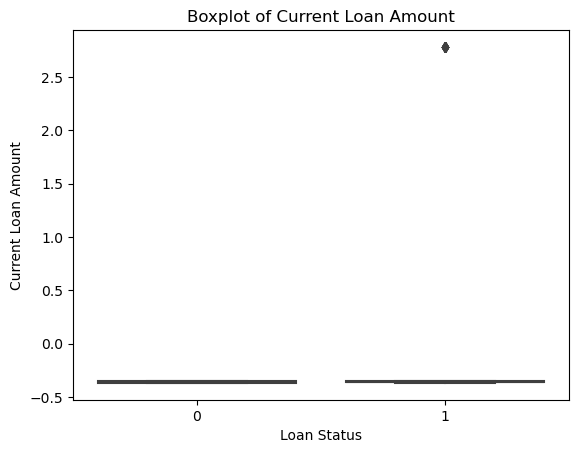

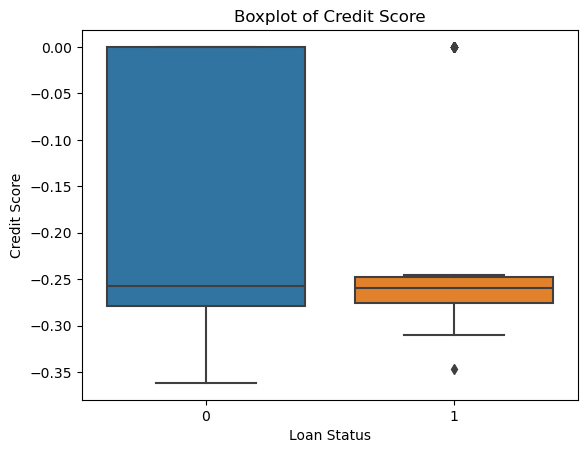

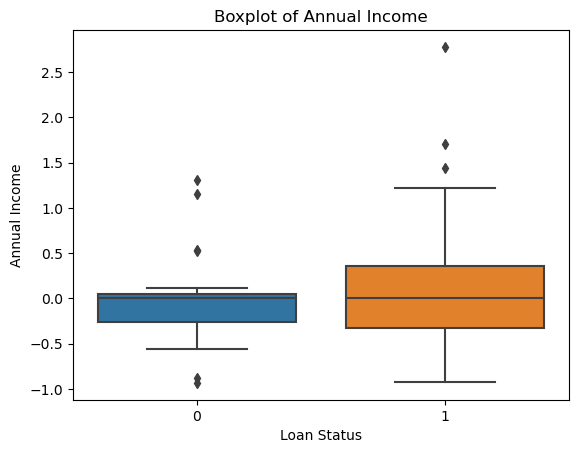

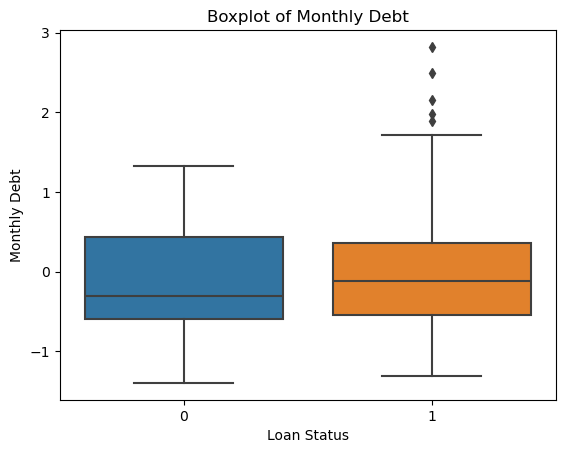

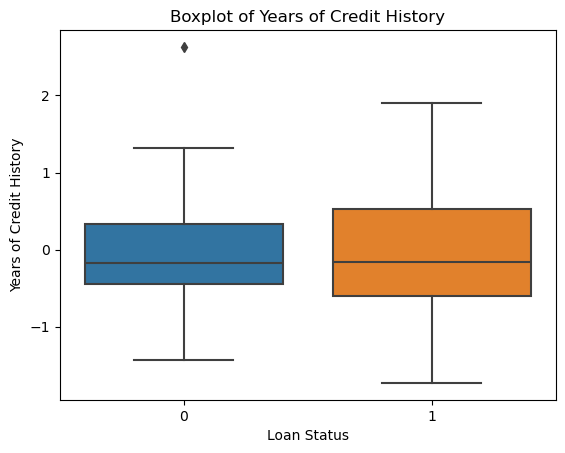

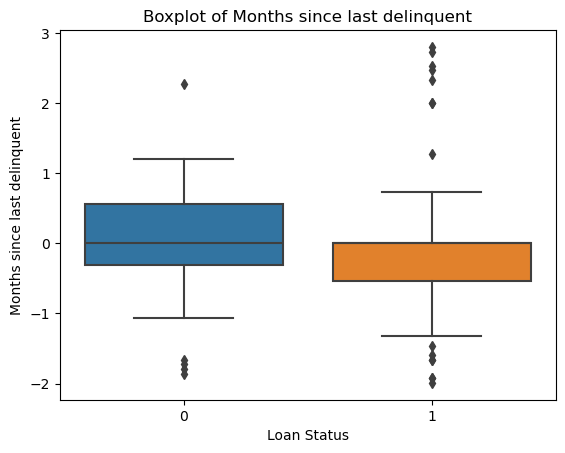

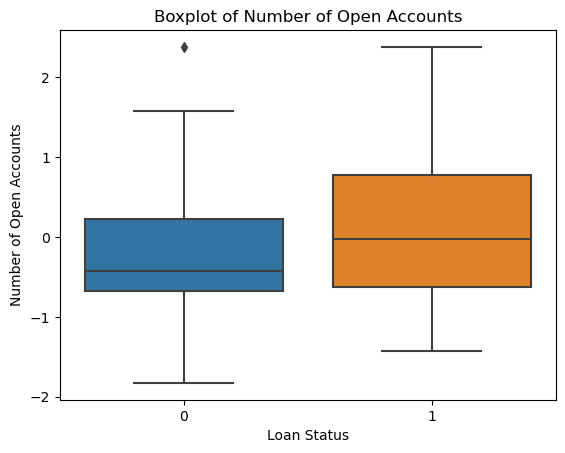

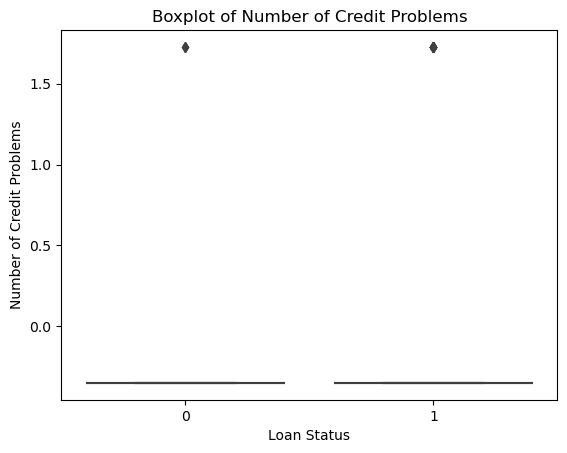

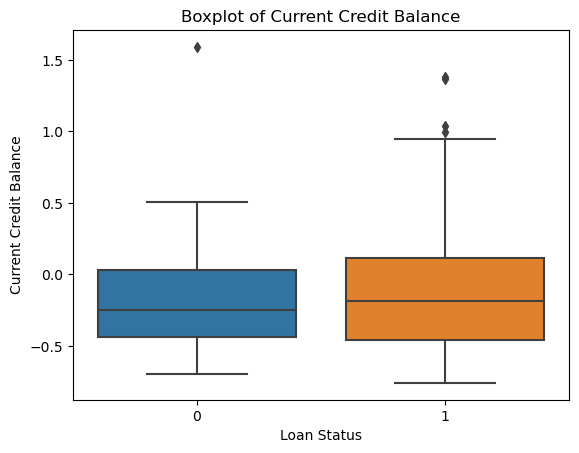

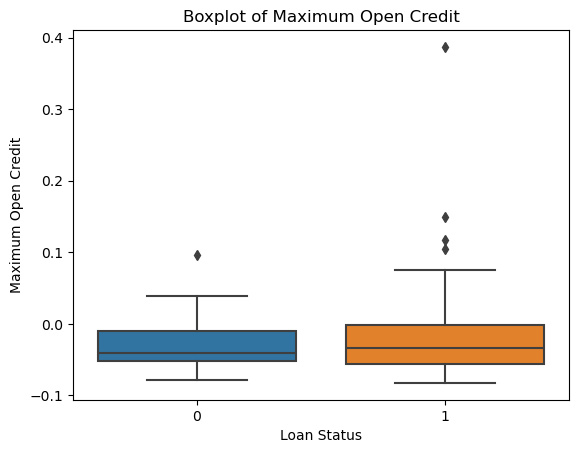

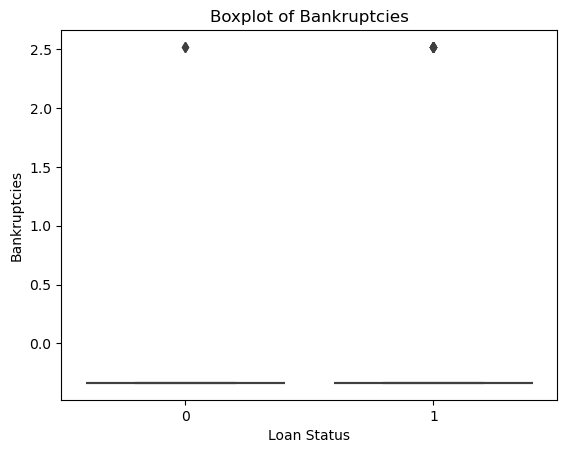

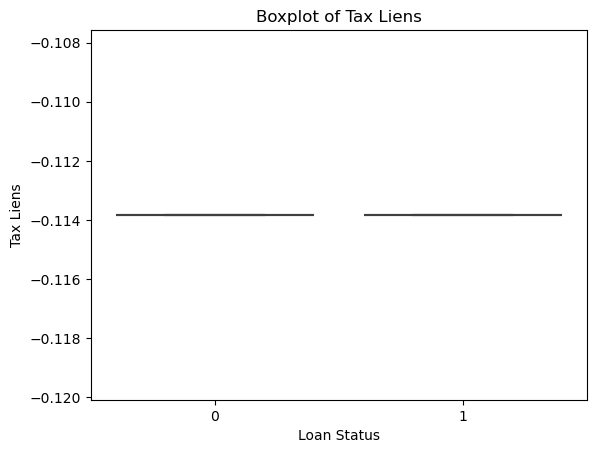

In [92]:
for i in con:
  sns.boxplot(x=Y_smote['Loan Status'],y=X_smote[i].head(100))
  plt.title(f'Boxplot of {i}')
  show()

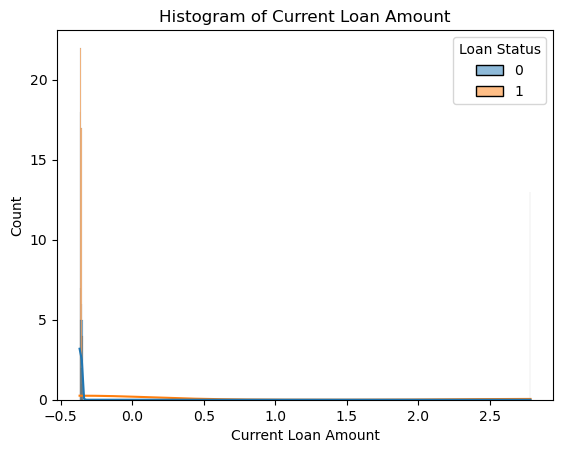

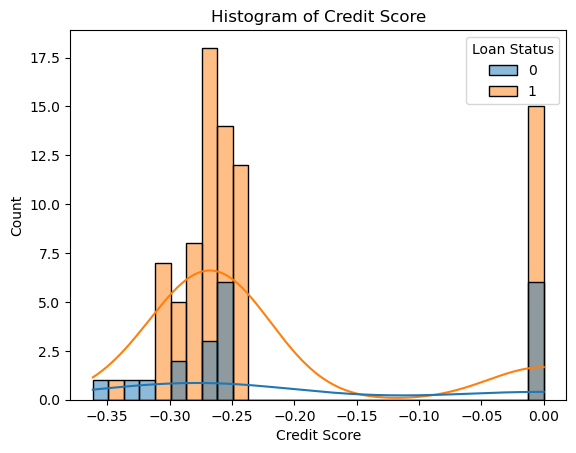

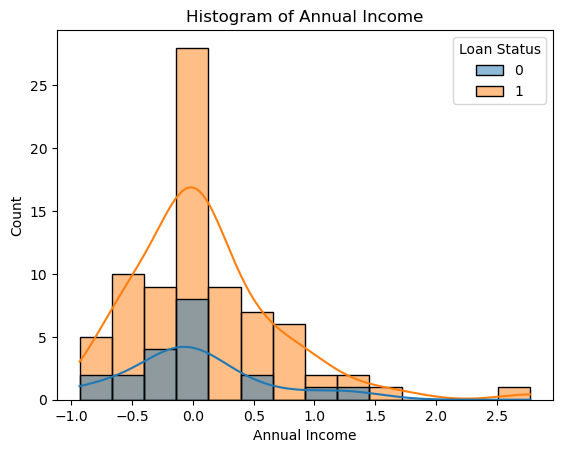

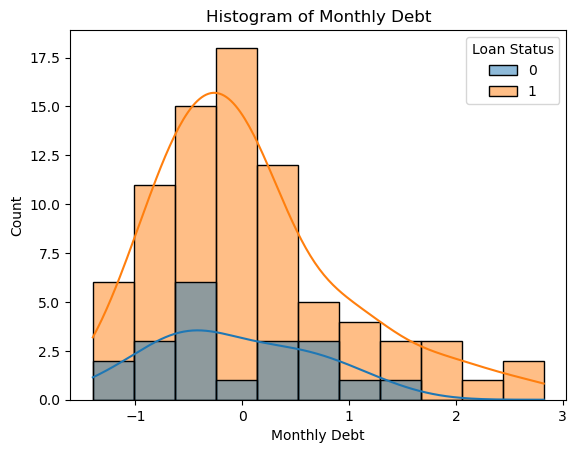

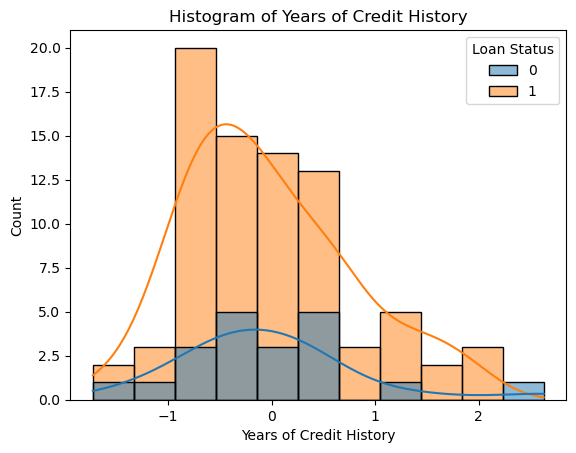

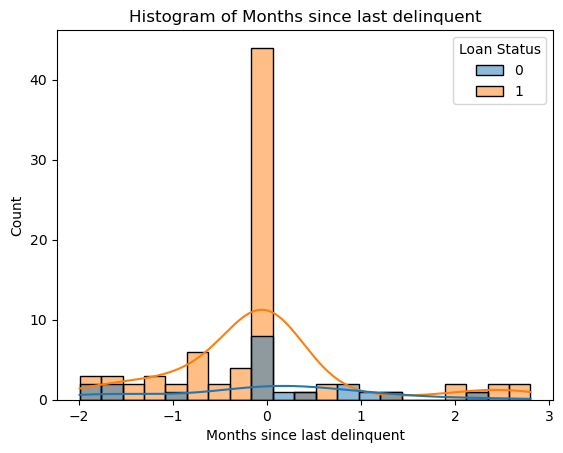

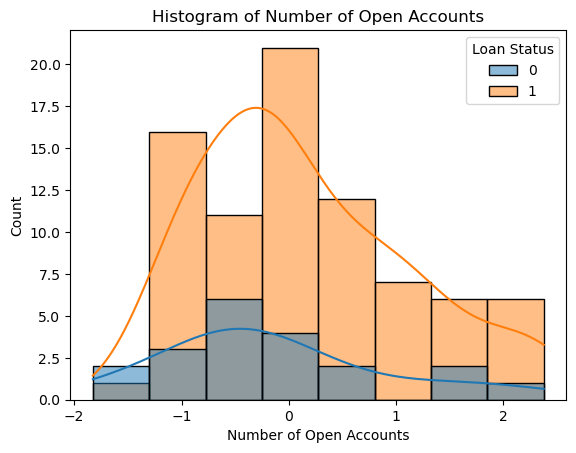

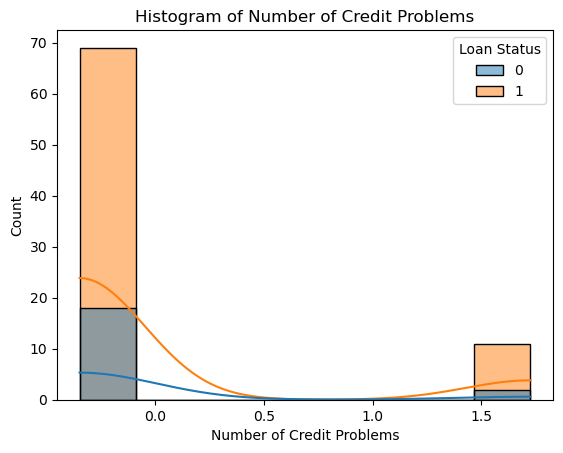

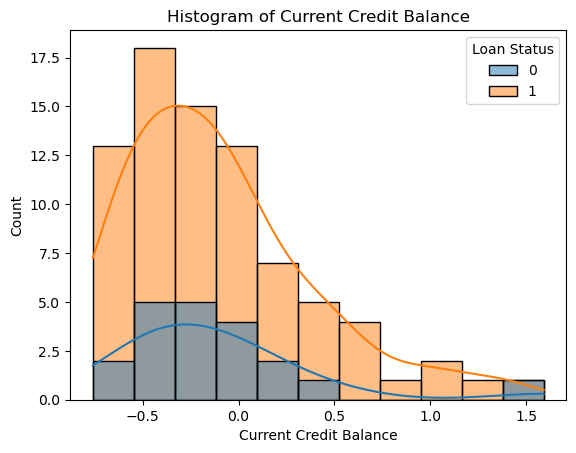

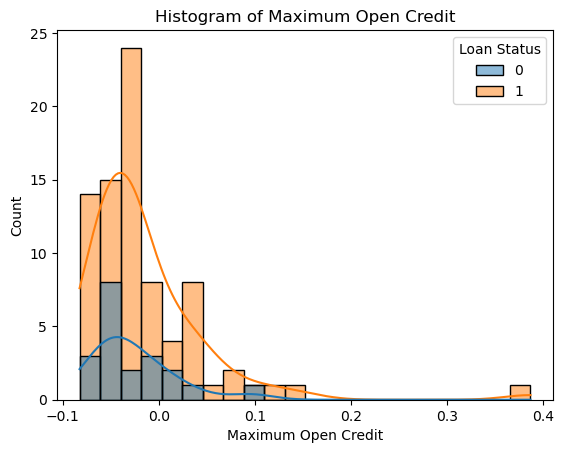

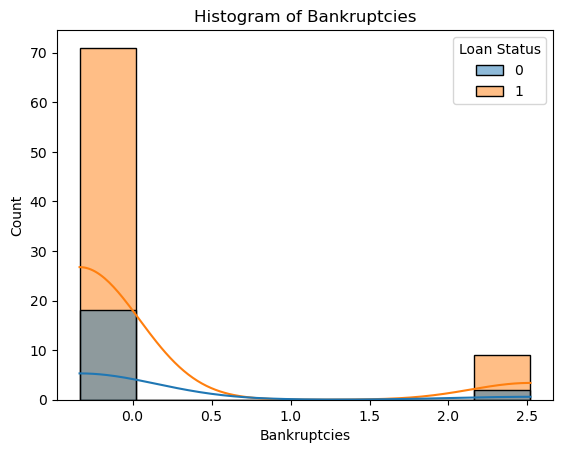

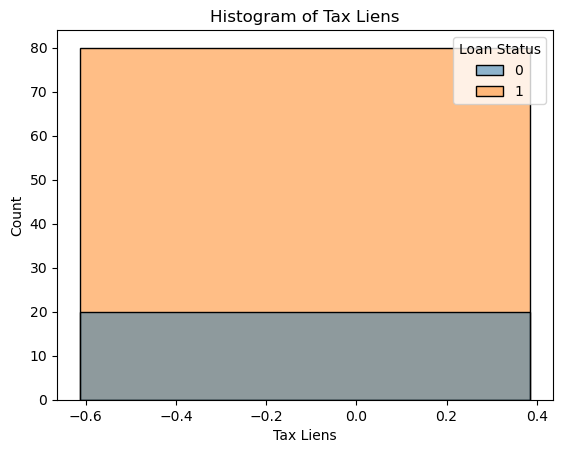

In [93]:
for i in con:
  sns.histplot(x=X_smote[i].head(100),hue=Y_smote['Loan Status'],kde=True)
  plt.title(f'Histogram of {i}')
  show()

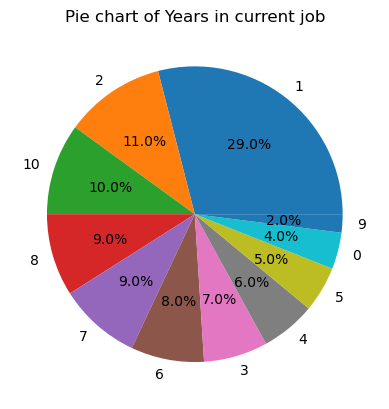

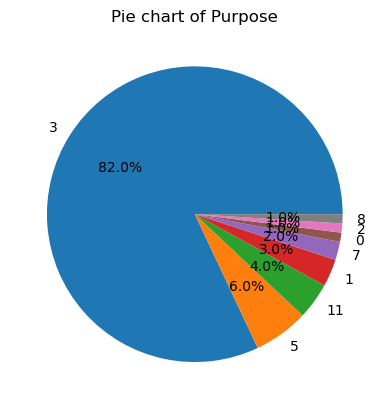

In [133]:
for i in cat:
  x=X_smote[i].head(100).value_counts()
  plt.pie(x,labels=x.index,autopct='%1.1f%%')
  plt.title(f'Pie chart of {i}')
  plt.show()

In [95]:
lr=LogisticRegression()
model=lr.fit(X_smote,Y_smote)
Ypred_train=model.predict(X_smote)
Ypred_test=model.predict(Xtest)

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [97]:
print("Training accuracy score is",accuracy_score(Y_smote,Ypred_train))
print("Testing accuracy score is",accuracy_score(Ytest,Ypred_test))
print('***')
print("Training confusion matrix is",confusion_matrix(Y_smote,Ypred_train))
print("Testing confusion matrix is",confusion_matrix(Ytest,Ypred_test))

Training accuracy score is 0.6370554466535985
Testing accuracy score is 0.5671607883228261
***
Training confusion matrix is [[52993 18427]
 [33416 38004]]
Testing confusion matrix is [[2355  987]
 [6634 7631]]


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [99]:
dtc=DecisionTreeClassifier(max_depth=3)
rfc=RandomForestClassifier(n_estimators=10)

In [100]:
sfs=SequentialFeatureSelector(model,n_features_to_select='auto',direction='forward',cv=4)
sfs.fit(X_smote,Y_smote)
model=DecisionTreeClassifier(max_depth=3)

In [101]:
print("Selected features are:",sfs.get_support(indices=True))

Selected features are: [ 1  3  6  7 10 11 13 15]


In [102]:
print("Training accuracy score is",accuracy_score(Y_smote,Ypred_train))
print("Testing accuracy score is",accuracy_score(Ytest,Ypred_test))
print('***')
print("Training confusion matrix is",confusion_matrix(Y_smote,Ypred_train))
print("Testing confusion matrix is",confusion_matrix(Ytest,Ypred_test))

Training accuracy score is 0.6370554466535985
Testing accuracy score is 0.5671607883228261
***
Training confusion matrix is [[52993 18427]
 [33416 38004]]
Testing confusion matrix is [[2355  987]
 [6634 7631]]


In [103]:
sfs=SequentialFeatureSelector(model,n_features_to_select='auto',direction='forward',cv=4)
sfs.fit(X_smote,Y_smote)
model=RandomForestClassifier(n_estimators=10)

In [104]:
print("Selected features are:",sfs.get_support(indices=True))

Selected features are: [0 2 3 4 5 6 7 8]


In [105]:
print("Training accuracy score is",accuracy_score(Y_smote,Ypred_train))
print("Testing accuracy score is",accuracy_score(Ytest,Ypred_test))
print('***')
print("Training confusion matrix is",confusion_matrix(Y_smote,Ypred_train))
print("Testing confusion matrix is",confusion_matrix(Ytest,Ypred_test))

Training accuracy score is 0.6370554466535985
Testing accuracy score is 0.5671607883228261
***
Training confusion matrix is [[52993 18427]
 [33416 38004]]
Testing confusion matrix is [[2355  987]
 [6634 7631]]


In [106]:
from sklearn.ensemble import AdaBoostClassifier
d1=[lr,dtc,rfc]
for i in d1:
  adc=AdaBoostClassifier(i,n_estimators=10)
  model=adc.fit(X_smote,Y_smote)
  Ypred_train=model.predict(X_smote)
  Ypred_test=model.predict(Xtest)
  print(f"**{i}**")
  print('Training Accuracy is',accuracy_score(Y_smote,Ypred_train))
  print('Testing accuracy is',accuracy_score(Ytest,Ypred_test))
  print("****")
  print("Training confusion matrix is",confusion_matrix(Y_smote,Ypred_train))
  print("Testing confusion matrix is",confusion_matrix(Ytest,Ypred_test))
  print("****")

**LogisticRegression()**
Training Accuracy is 0.6142047045645478
Testing accuracy is 0.5209291758959504
****
Training confusion matrix is [[54451 16969]
 [38138 33282]]
Testing confusion matrix is [[2505  837]
 [7598 6667]]
****
**DecisionTreeClassifier(max_depth=3)**
Training Accuracy is 0.7921940632875946
Testing accuracy is 0.776736525245641
****
Training confusion matrix is [[47256 24164]
 [ 5519 65901]]
Testing confusion matrix is [[  503  2839]
 [ 1092 13173]]
****
**RandomForestClassifier(n_estimators=10)**
Training Accuracy is 1.0
Testing accuracy is 1.0
****
Training confusion matrix is [[71420     0]
 [    0 71420]]
Testing confusion matrix is [[ 3342     0]
 [    0 14265]]
****


In [107]:
adc=AdaBoostClassifier(rfc,n_estimators=10)
model=adc.fit(X_smote,Y_smote) ## final Algoridom 

In [108]:
Ypred_train=model.predict(X_smote)
Ypred_test=model.predict(Xtest)
print('Training Accuracy is',accuracy_score(Y_smote,Ypred_train))
print('Testing accuracy is',accuracy_score(Ytest,Ypred_test))
print("****")
print("Training confusion matrix is",confusion_matrix(Y_smote,Ypred_train))
print("Testing confusion matrix is",confusion_matrix(Ytest,Ypred_test))
print("****")

Training Accuracy is 1.0
Testing accuracy is 1.0
****
Training confusion matrix is [[71420     0]
 [    0 71420]]
Testing confusion matrix is [[ 3342     0]
 [    0 14265]]
****


In [109]:
df1=pd.read_csv('Downloads/credit_test p1.csv')
df1.head(1)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0


In [110]:
for i in df1.columns:
  if df1[i].dtypes=='object':
    df1[i]=df1[i].fillna(df1[i].mode()[0])
  else:
    df1[i]=df1[i].fillna(df1[i].mean())

In [111]:
df1.isnull().sum().sum()

0

In [112]:
X1=df1[selected_features]

In [113]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [114]:
cat=[]
con=[]
for i in X1.columns:
  if X1[i].dtypes==object:
    cat.append(i)
  else:
    con.append(i)

In [115]:
X1cat=X1[cat]
X1con=X1[con]

In [116]:
le = LabelEncoder()
for i in X1cat.columns:
  X1cat[i]=le.fit_transform(X1cat[i])

In [117]:
ss=StandardScaler()
X1con=pd.DataFrame(ss.fit_transform(X1con),columns=con)

In [118]:
X1=X1con.join(X1cat)
X1.head()

,Credit Score,Monthly Debt,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens,Years in current job,Purpose
0,-0.254565,1.934263,-0.422160,-0.336180,-0.338690,-0.108756,1,3
1,-0.264563,1.493070,-0.017035,-0.336180,-0.338690,-0.108756,1,3
2,-0.283791,-0.823719,-0.219598,-0.336180,-0.338690,-0.108756,2,3
3,-0.269947,-0.136040,0.995776,1.695121,2.572117,-0.108756,1,3
4,-0.256872,1.727302,0.590652,-0.336180,-0.338690,-0.108756,1,3


In [119]:
X1=pd.get_dummies(X1,columns=cat)
X1.head()

,Credit Score,Monthly Debt,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens,Years in current job_0,Years in current job_1,Years in current job_2,Years in current job_3,...,Purpose_6,Purpose_7,Purpose_8,Purpose_9,Purpose_10,Purpose_11,Purpose_12,Purpose_13,Purpose_14,Purpose_15
0,-0.254565,1.934263,-0.422160,-0.336180,-0.338690,-0.108756,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.264563,1.493070,-0.017035,-0.336180,-0.338690,-0.108756,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.283791,-0.823719,-0.219598,-0.336180,-0.338690,-0.108756,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.269947,-0.136040,0.995776,1.695121,2.572117,-0.108756,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.256872,1.727302,0.590652,-0.336180,-0.338690,-0.108756,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
X1_cols=set(X1.columns)
X_smote_cols= set(X_smote.columns)

In [121]:
missing_cols=list(X_smote_cols-X1_cols)
for col in missing_cols:
  X1[col]=0

In [122]:
extra_col=list(X1_cols- X_smote_cols)
X1.drop(extra_col, axis=1, inplace=True)

In [123]:
X1=X1[X_smote.columns]
X1.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Years in current job,Home Ownership,Purpose
0,0,-0.254565,0,1.934263,0,0,-0.422160,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0
1,0,-0.264563,0,1.493070,0,0,-0.017035,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0
2,0,-0.283791,0,-0.823719,0,0,-0.219598,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0
3,0,-0.269947,0,-0.136040,0,0,0.995776,1.695121,0,0,2.572117,-0.108756,0,0,0,0
4,0,-0.256872,0,1.727302,0,0,0.590652,-0.336180,0,0,-0.338690,-0.108756,0,0,0,0


In [124]:
predictions=model.predict(X1)
print(predictions)

[1 1 1 ... 1 1 1]


In [131]:
X1['Loan Status']=predictions
X1.head(1)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Years in current job,Home Ownership,Purpose,Loan Status,Id
0,0,-0.254565,0,1.934263,0,0,-0.42216,-0.33618,0,0,-0.33869,-0.108756,0,0,0,0,1,1


In [132]:
X1['Id']=(X1.index)+1
X1.head(1)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term,Years in current job,Home Ownership,Purpose,Loan Status,Id
0,0,-0.254565,0,1.934263,0,0,-0.42216,-0.33618,0,0,-0.33869,-0.108756,0,0,0,0,1,1


In [127]:
df2=X1[['Id','Loan Status']]
df2

,Id,Loan Status
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
10348,10349,1
10349,10350,1
10350,10351,1
10351,10352,1


In [128]:
df2.to_csv('Loan Status Predictions.csv', index=False)

In [130]:
df2.to_verify = pd.read_csv('Loan Status Predictions.csv')
df2.to_verify

,Id,Loan Status
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
10348,10349,1
10349,10350,1
10350,10351,1
10351,10352,1
